<a href="https://colab.research.google.com/github/wei-enwang/space-ham/blob/main/main_driver.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import nltk
from nltk.corpus import words
import torch
import torch.nn as nn
from torch.optim import Adam
from torch.utils import data
from preprocess import WholeData, BalancedData

import models
import utils

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/weinwang/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
nltk.download('words')

device = "cuda" if torch.cuda.is_available() else "cpu"
assert device == "cuda"   # use gpu whenever you can!

seed = 32
np.random.seed(seed)
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)

[nltk_data] Downloading package words to /home/weinwang/nltk_data...
[nltk_data]   Package words is already up-to-date!


In [3]:
plot_yes = True

# use one dataset for now
train_data_dir = "./data/enron1/"
test_data_dir = "./data/enron2/"
output_dir = "./output/"

# hyperparameters
batch_size = 64
hidden_size = 128
num_layer = 3
dropout = 0.5
learning_rate = 1e-4
epochs = 30
max_len = 200

In [4]:
vocab = set([str.lower() for str in words.words()])

train_dataset = WholeData(train_data_dir, src_vocab=vocab, use_max_len=True, max_len=max_len)
test_dataset = WholeData(test_data_dir, src_vocab=vocab, use_max_len=True, max_len=max_len)
# Balanced dataset
# train_dataset = BalancedData(train_data_dir, src_vocab=vocab, use_max_len=True, max_len=max_len)
# test_dataset = BalancedData(test_data_dir, src_vocab=vocab, use_max_len=True, max_len=max_len)

w2idx = train_dataset.src_v2id

embed = utils.load_pretrained_vectors(w2idx, "fastText/crawl-300d-2M.vec")
embed = torch.tensor(embed)

Loading pretrained vectors...
234378


0it [00:00, ?it/s]

There are 75835 / 234379 pretrained vectors found.


In [5]:
train_dataloader = data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True, 
                                   num_workers=8, pin_memory=True)
test_dataloader = data.DataLoader(test_dataset, batch_size=batch_size, shuffle=True, 
                                  num_workers=8, pin_memory=True, drop_last=True)


In [6]:
model = models.spam_lstm(hidden_size=hidden_size, pretrained_embedding=embed, dropout=dropout).to(device)
loss_fn = nn.BCEWithLogitsLoss().to(device)
opt = Adam(model.parameters(), lr=learning_rate)

Using pretrained vectors...


  0%|          | 0/30 [00:00<?, ?it/s]/home/weinwang/anaconda3/envs/nlp/lib/python3.6/site-packages/torch/nn/functional.py:1350: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
  3%|▎         | 1/30 [00:09<04:38,  9.61s/it]

Epoch 0
-------------------------------
Training loss: 0.637941, avg accuracy: 0.709891
Testing loss: 0.568102, avg accuracy: 0.745021


  7%|▋         | 2/30 [00:19<04:29,  9.62s/it]

Epoch 1
-------------------------------
Training loss: 0.596255, avg accuracy: 0.709936
Testing loss: 0.560600, avg accuracy: 0.744334


 10%|█         | 3/30 [00:28<04:18,  9.58s/it]

Epoch 2
-------------------------------
Training loss: 0.578779, avg accuracy: 0.710069
Testing loss: 0.570260, avg accuracy: 0.745021


 13%|█▎        | 4/30 [00:38<04:09,  9.60s/it]

Epoch 3
-------------------------------
Training loss: 0.566230, avg accuracy: 0.710114
Testing loss: 0.529332, avg accuracy: 0.745192


 17%|█▋        | 5/30 [00:47<03:59,  9.58s/it]

Epoch 4
-------------------------------
Training loss: 0.519254, avg accuracy: 0.713289
Testing loss: 0.393597, avg accuracy: 0.743647


 20%|██        | 6/30 [00:57<03:50,  9.60s/it]

Epoch 5
-------------------------------
Training loss: 0.416530, avg accuracy: 0.736482
Testing loss: 0.346086, avg accuracy: 0.760989


 23%|██▎       | 7/30 [01:07<03:41,  9.63s/it]

Epoch 6
-------------------------------
Training loss: 0.389134, avg accuracy: 0.795139
Testing loss: 0.317303, avg accuracy: 0.844952


 27%|██▋       | 8/30 [01:16<03:31,  9.62s/it]

Epoch 7
-------------------------------
Training loss: 0.382761, avg accuracy: 0.809785
Testing loss: 0.304062, avg accuracy: 0.884272


 30%|███       | 9/30 [01:26<03:22,  9.63s/it]

Epoch 8
-------------------------------
Training loss: 0.373292, avg accuracy: 0.811758
Testing loss: 0.296968, avg accuracy: 0.873798


 33%|███▎      | 10/30 [01:36<03:12,  9.65s/it]

Epoch 9
-------------------------------
Training loss: 0.478995, avg accuracy: 0.777629
Testing loss: 0.356530, avg accuracy: 0.800996


 37%|███▋      | 11/30 [01:45<03:03,  9.66s/it]

Epoch 10
-------------------------------
Training loss: 0.413318, avg accuracy: 0.750683
Testing loss: 0.332469, avg accuracy: 0.828812


 40%|████      | 12/30 [01:55<02:53,  9.66s/it]

Epoch 11
-------------------------------
Training loss: 0.406447, avg accuracy: 0.754763
Testing loss: 0.333677, avg accuracy: 0.826923


 43%|████▎     | 13/30 [02:05<02:44,  9.67s/it]

Epoch 12
-------------------------------
Training loss: 0.404581, avg accuracy: 0.757493
Testing loss: 0.333988, avg accuracy: 0.830014


 47%|████▋     | 14/30 [02:14<02:34,  9.66s/it]

Epoch 13
-------------------------------
Training loss: 0.403297, avg accuracy: 0.761099
Testing loss: 0.331171, avg accuracy: 0.837054


 50%|█████     | 15/30 [02:24<02:24,  9.66s/it]

Epoch 14
-------------------------------
Training loss: 0.609266, avg accuracy: 0.760075
Testing loss: 0.554146, avg accuracy: 0.761504


 53%|█████▎    | 16/30 [02:34<02:15,  9.66s/it]

Epoch 15
-------------------------------
Training loss: 0.569005, avg accuracy: 0.754615
Testing loss: 0.553342, avg accuracy: 0.761676


 57%|█████▋    | 17/30 [02:43<02:05,  9.64s/it]

Epoch 16
-------------------------------
Training loss: 0.560876, avg accuracy: 0.757746
Testing loss: 0.546236, avg accuracy: 0.765282


 60%|██████    | 18/30 [02:53<01:55,  9.65s/it]

Epoch 17
-------------------------------
Training loss: 0.543804, avg accuracy: 0.765937
Testing loss: 0.542966, avg accuracy: 0.766140


 63%|██████▎   | 19/30 [03:03<01:46,  9.64s/it]

Epoch 18
-------------------------------
Training loss: 0.538773, avg accuracy: 0.766886
Testing loss: 0.541675, avg accuracy: 0.767170


 67%|██████▋   | 20/30 [03:12<01:36,  9.65s/it]

Epoch 19
-------------------------------
Training loss: 0.537798, avg accuracy: 0.767198
Testing loss: 0.541872, avg accuracy: 0.766999


 70%|███████   | 21/30 [03:22<01:26,  9.64s/it]

Epoch 20
-------------------------------
Training loss: 0.538898, avg accuracy: 0.766708
Testing loss: 0.542053, avg accuracy: 0.766827


 73%|███████▎  | 22/30 [03:32<01:17,  9.64s/it]

Epoch 21
-------------------------------
Training loss: 0.537817, avg accuracy: 0.767272
Testing loss: 0.541326, avg accuracy: 0.767342


 77%|███████▋  | 23/30 [03:41<01:07,  9.65s/it]

Epoch 22
-------------------------------
Training loss: 0.537675, avg accuracy: 0.767317
Testing loss: 0.541570, avg accuracy: 0.767342


 80%|████████  | 24/30 [03:51<00:57,  9.65s/it]

Epoch 23
-------------------------------
Training loss: 0.537868, avg accuracy: 0.767361
Testing loss: 0.541394, avg accuracy: 0.767170


 83%|████████▎ | 25/30 [04:00<00:48,  9.64s/it]

Epoch 24
-------------------------------
Training loss: 0.538558, avg accuracy: 0.767495
Testing loss: 0.541583, avg accuracy: 0.767342


 87%|████████▋ | 26/30 [04:10<00:38,  9.65s/it]

Epoch 25
-------------------------------
Training loss: 0.537989, avg accuracy: 0.767361
Testing loss: 0.542173, avg accuracy: 0.766827


 90%|█████████ | 27/30 [04:20<00:28,  9.66s/it]

Epoch 26
-------------------------------
Training loss: 0.538395, avg accuracy: 0.767317
Testing loss: 0.541262, avg accuracy: 0.767514


 93%|█████████▎| 28/30 [04:29<00:19,  9.65s/it]

Epoch 27
-------------------------------
Training loss: 0.538015, avg accuracy: 0.767228
Testing loss: 0.542371, avg accuracy: 0.766655


 97%|█████████▋| 29/30 [04:39<00:09,  9.65s/it]

Epoch 28
-------------------------------
Training loss: 0.537739, avg accuracy: 0.767450
Testing loss: 0.541833, avg accuracy: 0.767170


100%|██████████| 30/30 [04:49<00:00,  9.64s/it]

Epoch 29
-------------------------------
Training loss: 0.537309, avg accuracy: 0.767495
Testing loss: 0.542213, avg accuracy: 0.766827


Final testing loss: 0.542245, testing accuracy: 0.766827
Ham Precision: 0.763582, Recall: 0.994927, F1 score: 0.864037.
Ham Precision: 0.872832, Recall: 0.101547, F1 score: 0.181928.


(0.5373089261996893, 0.5422446118606316)

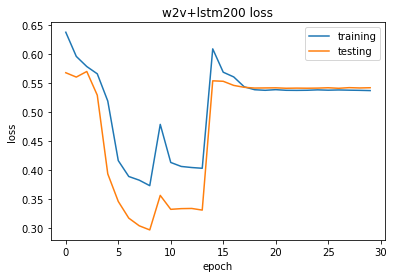

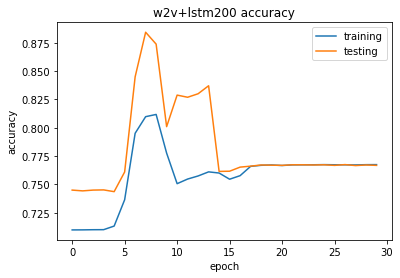

In [7]:
utils.train_test_scheme(train_dataloader, test_dataloader, model, loss_fn, opt, 
                        task_name="w2v+lstm200", epochs=epochs, 
                        vis=plot_yes, print_every=1, img_dir=output_dir)



In [8]:
#torch.save(model.state_dict(), output_dir+"balancew2v_lstm100batch32.pt")

In [9]:
#test_message = "Subject: Look, I understand everything, but this is a frank bust... Look here and tell me your opinion"

In [10]:
# from preprocess import clean_string
# context = clean_string(test_message)
# sent_id = [0 for _ in range(max_len)]
# for i, w in enumerate(context):
#     if i >= max_len:
#         break
#     if w not in train_dataset.vocab:
#         w = '<unk>'
#     sent_id[i] = train_dataset.src_v2id[w]
# sent_id = torch.unsqueeze(torch.tensor(sent_id),dim=0).to(device)

In [11]:
# model.eval()
# print(f"Email message: \"{test_message}\"")
# with torch.no_grad():
#     pred = nn.Sigmoid()(model(sent_id))
#     pred = torch.squeeze(pred)

#     if pred > 0.5:
#         print("This is a ham email message.")
#     else:
#         print("This is a spam email message.")

# print(f"The probability of this email being a spam is {(1-pred)*100:.1f}%.")